# **Examen  Parcial 2022 -1**

# Problema 01

~~~
ALUMNO : TORRE ARTEAGA ALEXANDER
CODIGO : 19200246
~~~

### Importar librerías

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Recuperar los datos

In [56]:
data = pd.read_csv('airfoil_self_noise.dat',names=['Frequency','Angle','Chord','Free-stream','Suction','Pressure'],delimiter='	')

In [57]:
data.head()

,Frequency,Angle,Chord,Free-stream,Suction,Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Frequency    1503 non-null   int64  
 1   Angle        1503 non-null   float64
 2   Chord        1503 non-null   float64
 3   Free-stream  1503 non-null   float64
 4   Suction      1503 non-null   float64
 5   Pressure     1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [59]:
data.describe()

,Frequency,Angle,Chord,Free-stream,Suction,Pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


### Análisis exploratorio de datos

In [61]:
data.columns

Index(['Frequency', 'Angle', 'Chord', 'Free-stream', 'Suction', 'Pressure'], dtype='object')

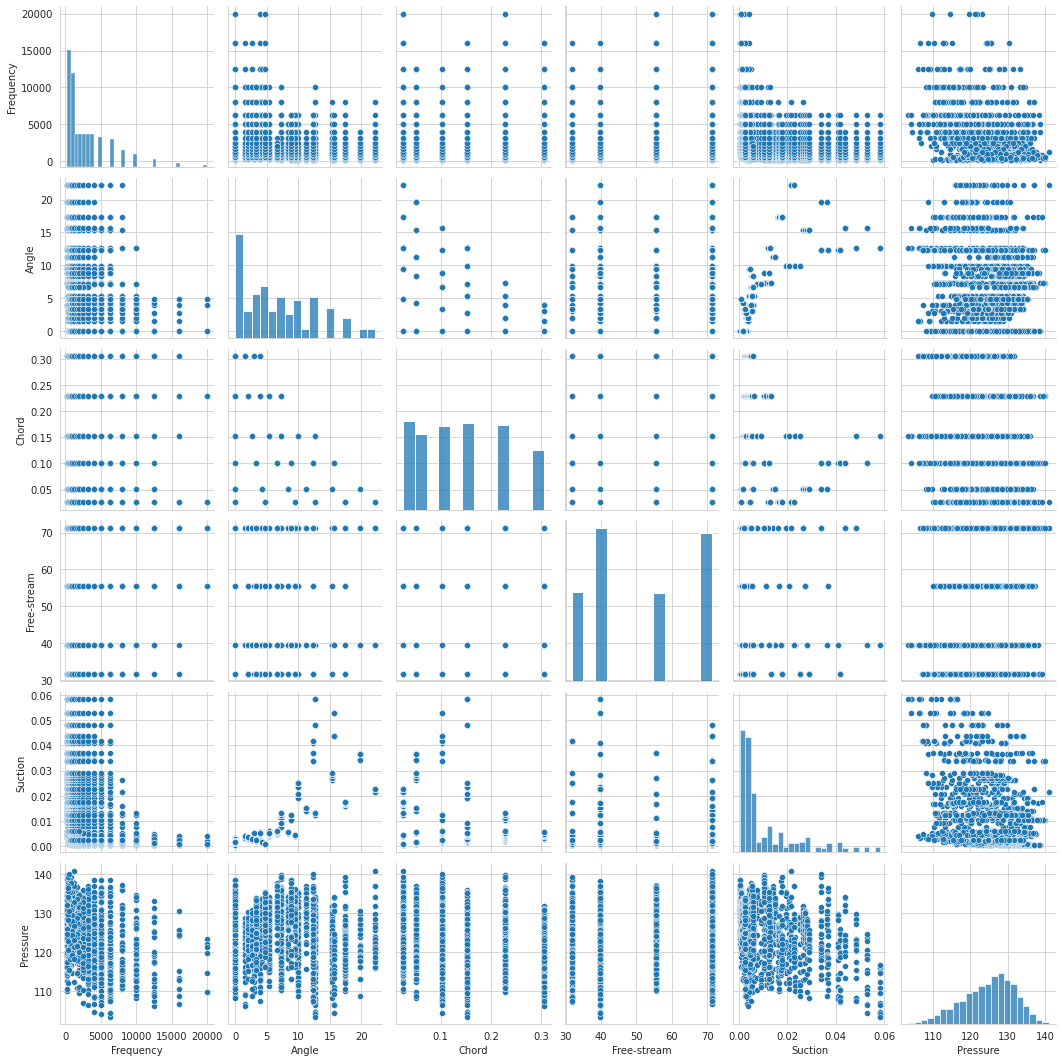

In [13]:
sns.pairplot(data)

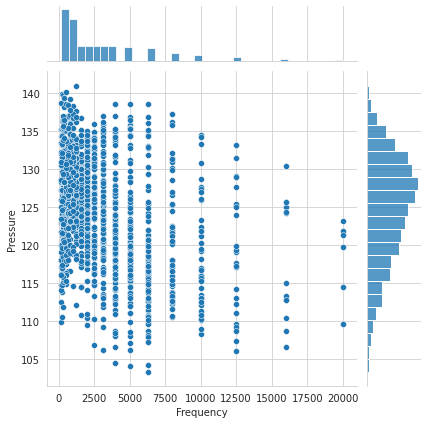

In [62]:
sns.jointplot(x='Frequency',y='Pressure',data=data)

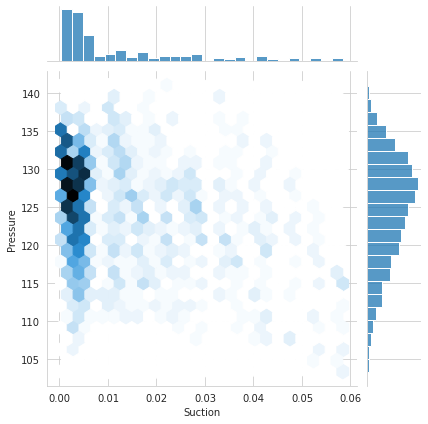

In [47]:
sns.jointplot(x='Suction',y='Pressure',data=data, kind='hex')

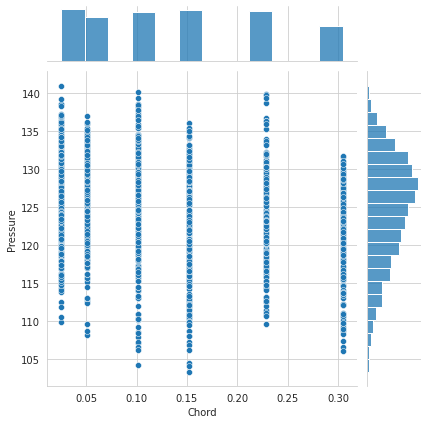

In [12]:
sns.jointplot(x='Chord',y='Pressure',data=data)

### División en conjunto de entrenamiento y prueba

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = data.drop(['Pressure'],axis=1)
y = data['Pressure']

### Prueba con random_state 30

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=30)

### Predicciones y Evaluaciones

In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
modelo = LinearRegression()

In [143]:
modelo.fit(X_train,y_train)

LinearRegression()

In [144]:
print("Interceptor: ",modelo.intercept_)

Interceptor:  133.10831452855436


In [145]:
print("Coeficientes:",modelo.coef_)

Coeficientes: [-1.24685713e-03 -4.18866932e-01 -3.52088780e+01  9.06902011e-02
 -1.52872702e+02]


In [146]:
predicciones = modelo.predict(X_test)

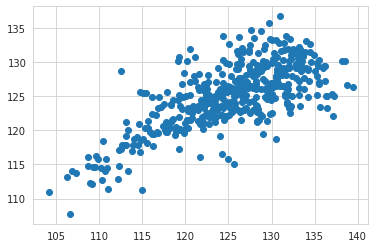

In [147]:
plt.scatter(y_test,predicciones)

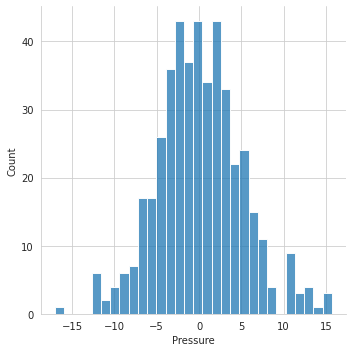

In [85]:
sns.displot((y_test-predicciones),bins=30)

In [86]:
from sklearn import metrics
print('MAE ->', metrics.mean_absolute_error(y_test, predicciones))
print('MSE ->', metrics.mean_squared_error(y_test, predicciones))
print('RMSE ->', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

MAE -> 3.8881966204737775
MSE -> 25.204991719978228
RMSE -> 5.020457321796315


In [135]:
coef_data = pd.DataFrame(modelo.coef_,X.columns,columns=['Coeficientes'])
coef_data

,Coeficientes
Frequency,-0.001296
Angle,-0.449311
Chord,-38.651055
Free-stream,0.099253
Suction,-149.656645


## Prueba con random_state 110

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=110)

In [126]:
modelo.fit(X_train,y_train)

LinearRegression()

In [127]:
print("Interceptor: ",modelo.intercept_)

Interceptor:  133.56464367607228


In [128]:
print("Coeficientes:",modelo.coef_)

Coeficientes: [-1.29573248e-03 -4.49310506e-01 -3.86510555e+01  9.92527733e-02
 -1.49656645e+02]


In [129]:
predicciones = modelo.predict(X_test)

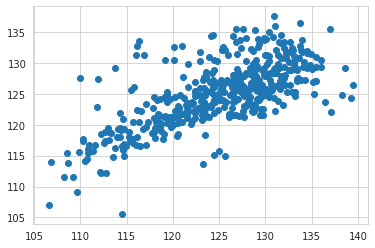

In [130]:
plt.scatter(y_test,predicciones)

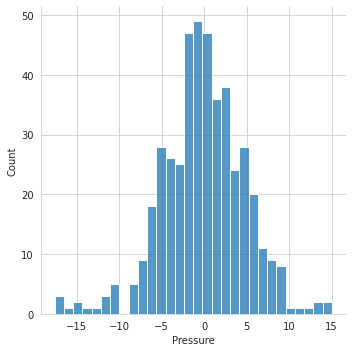

In [131]:
sns.displot((y_test-predicciones),bins=30)

In [132]:
from sklearn import metrics
print('MAE ->', metrics.mean_absolute_error(y_test, predicciones))
print('MSE ->', metrics.mean_squared_error(y_test, predicciones))
print('RMSE ->', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

MAE -> 3.7147580082397247
MSE -> 23.90811694668261
RMSE -> 4.889592717873607


In [134]:
coef_data = pd.DataFrame(modelo.coef_,X.columns,columns=['Coeficientes'])
coef_data

,Coeficientes
Frequency,-0.001296
Angle,-0.449311
Chord,-38.651055
Free-stream,0.099253
Suction,-149.656645


### Conclusión sobre el modelo

Teniedo como base los valores del archivo, frecuencia, ángulo de ataque, longitud de la cuerda, velocidad de flujo libre y espesor de desplazamiento del lado de succion se pudo determinar los valores del nivel de presión sonoro escalado precision. Tambien se puede apreciar que la variacion del espesor de desplazamiento de la succion y la longitud de cuerda son las variables que mas influyen en el resultado de la presion sonora escalada.